# NBA Archetypes (Part 2)

In modern basketball, player roles have evolved beyond traditional position-based categories, with each athlete contributing to their team in unique ways. Understanding these contributions can provide valuable insights into team dynamics, player development, and overall performance. This analysis explores the identification and characterization of distinct NBA player archetypes using advanced data from the 2023-2024 season.

By employing a clustering approach, we’ve grouped players into six archetypes, each representing a specific set of skills and playing styles. These clusters reflect players' overall impact on both ends of the court, including their scoring abilities, playmaking, defensive contributions, and efficiency. The six archetypes identified are:

- The MVP – Well-rounded stars excelling in scoring, playmaking, and defense.

- The Rebounder – Dominant in securing both offensive and defensive rebounds, with a strong interior presence.

- The Helping Hand – Balanced contributors who support their teams through steady all-around play.

- The Substitute – Reliable role players who make an impact during limited minutes, particularly in scoring.

- The Sneaky Sniper – Versatile players with strong long-range shooting and defensive ability.

- The Loser – Struggling players with inefficient scoring and minimal contributions across key areas.

This study not only defines these archetypes but also analyzes the correlations between key performance metrics to highlight the strengths and weaknesses that define each group. The insights drawn from this analysis are valuable for teams, coaches, and analysts looking to understand player dynamics and leverage these archetypes for team strategy and player development.

![Alt Text](images/archetype_avg_comparisons.png)

![Alt Text](images/avg_cluster_stats.png)

The data above (taken from Part 1) reveals key performance averages across various player groups, highlighting differences in scoring, playmaking, and defensive contributions. Players in some groups log significantly more minutes, with averages ranging from 1065.95 to 3260.90 total minutes played. Scoring varies widely, with points per player ranging from 73.22 to 2012.31, reflecting different offensive roles and efficiency. Three-point shooting shows considerable variation, with total three-pointers ranging from 8.83 to 174.38, and 3P% varying from 27.25% to 37.44%. Players in most groups demonstrate efficiency in two-point shooting, with averages between 95.26 and 553.17 total 2P, and generally high shooting percentages, ranging from 53.87% to 60.67%. Free throw performance also differs, with players averaging anywhere from 50.45 to 384.60 total FT, with FT% ranging from 71.73% to 83.28%.

Defensive contributions vary, with total defensive rebounds averaging from 27.90 to 473.77, and steals from 6.30 to 99.48. Blocks and turnovers also differ, with players averaging anywhere from 4.39 to 111.02 blocks, and turnovers ranging from 4.39 to 221.30. Overall, the data illustrates the diverse roles players occupy, with significant variation in their scoring abilities, defensive contributions, and overall efficiency.

## Initialization

In [1]:
# Data manipulation
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
# Load data function
def load_data(file_name, local_path, server_path):
    try:
        data = pd.read_csv(local_path + file_name)
        print(f"'{file_name}' file successfully read from the local path.")

    except FileNotFoundError:
        try:
            data = pd.read_csv(server_path + file_name)
            print(f"'{file_name}' file successfully read from the server path.")

        except FileNotFoundError:
            print(f"'{file_name}' file not found. Please check the file paths.")
            data = None
            
    return data

file_names = ['cluster_0.csv', 'cluster_1.csv', 'cluster_2.csv', 'cluster_3.csv', 'cluster_4.csv', 'cluster_5.csv']
local_path =  '/Users/benjaminstephen/Documents/TripleTen/Code_Pudding/NBA-Archetypes/datasets/'
server_path = '/datasets/'

cluster_0 = load_data(file_names[0], local_path, server_path)
cluster_1 = load_data(file_names[1], local_path, server_path) 
cluster_2 = load_data(file_names[2], local_path, server_path)
cluster_3 = load_data(file_names[3], local_path, server_path)   
cluster_4 = load_data(file_names[4], local_path, server_path) 
cluster_5 = load_data(file_names[5], local_path, server_path) 

'cluster_0.csv' file successfully read from the local path.
'cluster_1.csv' file successfully read from the local path.
'cluster_2.csv' file successfully read from the local path.
'cluster_3.csv' file successfully read from the local path.
'cluster_4.csv' file successfully read from the local path.
'cluster_5.csv' file successfully read from the local path.


## Function Definitions

In [3]:
def calculate_shooting_efficiency(cluster):
    """
    Calculates shooting efficiency metrics (3P%, 2P%, FT%) for the given cluster.

    Parameters:
        cluster (DataFrame): A DataFrame containing shooting data for players.

    Returns:
        DataFrame: The input DataFrame with added columns for shooting percentages.
    """
    cluster['3P%'] = (cluster['Total 3P'] / cluster['Total 3PA']) * 100
    cluster['2P%'] = (cluster['Total 2P'] / cluster['Total 2PA']) * 100
    cluster['FT%'] = (cluster['Total FT'] / cluster['Total FTA']) * 100
    
    return cluster

def plot_sorted_stats(cluster):
    """
    Analyzes and visualizes the average values of key basketball statistics for a given cluster.

    Parameters:
        cluster (DataFrame): A DataFrame containing basketball stats for players.

    Returns:
        Series: A sorted series of mean values for the selected features.
    """
    # Features to consider for analysis (excluding 'Player Name' and 'Archetype')
    features_to_consider = [
        'Total MP', 'Total 3P', 'Total 3PA', 'Total 2P', 'Total 2PA',
        'Total FT', 'Total FTA', 'Total ORB', 'Total DRB', 'Total AST',
        'Total STL', 'Total BLK', 'Total TOV', 'Total PF', 'Total PTS',
        '3P%', '2P%', 'FT%'
    ]

    # Calculate the mean of the features and sort them in descending order
    sorted_stats = cluster[features_to_consider].mean().sort_values(ascending=False)

    # Plot a horizontal bar chart
    plt.figure(figsize=(20, 5))
    sns.barplot(x=sorted_stats.values, y=sorted_stats.index, palette='viridis')
    plt.title("Average Performance Metrics")
    plt.xlabel("Average Value")
    plt.ylabel("Statistics")
    plt.show()

    # Display the sorted stats
    print("Sorted Stats:")
    print("-------------")
    display(sorted_stats)
    
    return sorted_stats

def plot_feature_relationships(cluster_data):
    """
    Visualizes pairwise relationships between selected scoring features and displays their correlation matrix.

    Parameters:
        cluster_data (DataFrame): A DataFrame containing basketball statistics for a cluster.

    Returns:
        DataFrame: The correlation matrix for the selected features.
    """
    # Define the features of interest
    features_of_interest = ['Total PTS', 'Total 3P', 'Total 2P', 'Total FT']

    # Calculate the correlation matrix
    corr_matrix = cluster_data[features_of_interest].corr()

    # Plot the pairwise relationships
    sns.pairplot(cluster_data[features_of_interest], height=4)
    plt.suptitle("Feature Relationships: Points, 3P, 2P, FT", y=1.02)
    plt.show()

    # Display the correlation matrix
    print("Correlation Coefficients:")
    print("-------------------------")
    display(corr_matrix)

    return corr_matrix

## Cluster 0 (The Loser Archetype)

- Scoring Struggles: Low Total PTS (73.22), poor 3P% (27.25%), and limited three-point contribution (Total 3P: 8.83).

- Limited Inside Scoring: Below-average Total 2P (18.76), with some efficiency in free throws (FT%: 71.73%).

- Minimal Impact on Rebounds, Playmaking, and Defense: Low Total DRB (27.90), Total AST (18.07), and Total STL (6.30).

- High Fouls and Turnovers: High Total PF (19.95) and Total TOV (9.73).

- Inefficient Court Time: Despite decent Total MP (216.26), overall lack of impact.

In [4]:
display(cluster_0)

,Player Name,Archetype,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
0,A.J. Green,0,616.0,67.2,168.0,16.8,28.0,16.8,16.8,11.2,56.0,28.0,11.2,5.6,11.2,50.4,252.0
1,A.J. Lawson,0,310.8,12.6,50.4,42.0,71.4,16.8,21.0,12.6,37.8,21.0,8.4,4.2,12.6,21.0,134.4
2,AJ Griffin,0,172.0,10.0,40.0,8.0,24.0,2.0,2.0,2.0,16.0,6.0,2.0,2.0,8.0,6.0,48.0
3,Adam Flagler,0,14.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
4,Adama Sanogo,0,65.7,0.0,0.0,14.4,27.0,8.1,11.7,18.9,17.1,0.0,0.9,0.0,5.4,5.4,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Wendell Moore Jr.,0,75.0,0.0,5.0,10.0,12.5,0.0,0.0,0.0,12.5,5.0,5.0,0.0,5.0,5.0,17.5
222,Wenyen Gabriel,0,81.0,1.0,6.0,7.0,16.0,0.0,5.0,7.0,18.0,3.0,2.0,2.0,8.0,10.0,17.0
223,Wesley Matthews,0,414.0,25.2,68.4,10.8,28.8,18.0,25.2,10.8,43.2,21.6,14.4,10.8,7.2,43.2,111.6
224,Xavier Moon,0,119.0,1.4,16.8,12.6,29.4,1.4,1.4,8.4,9.8,21.0,2.8,2.8,5.6,8.4,33.6


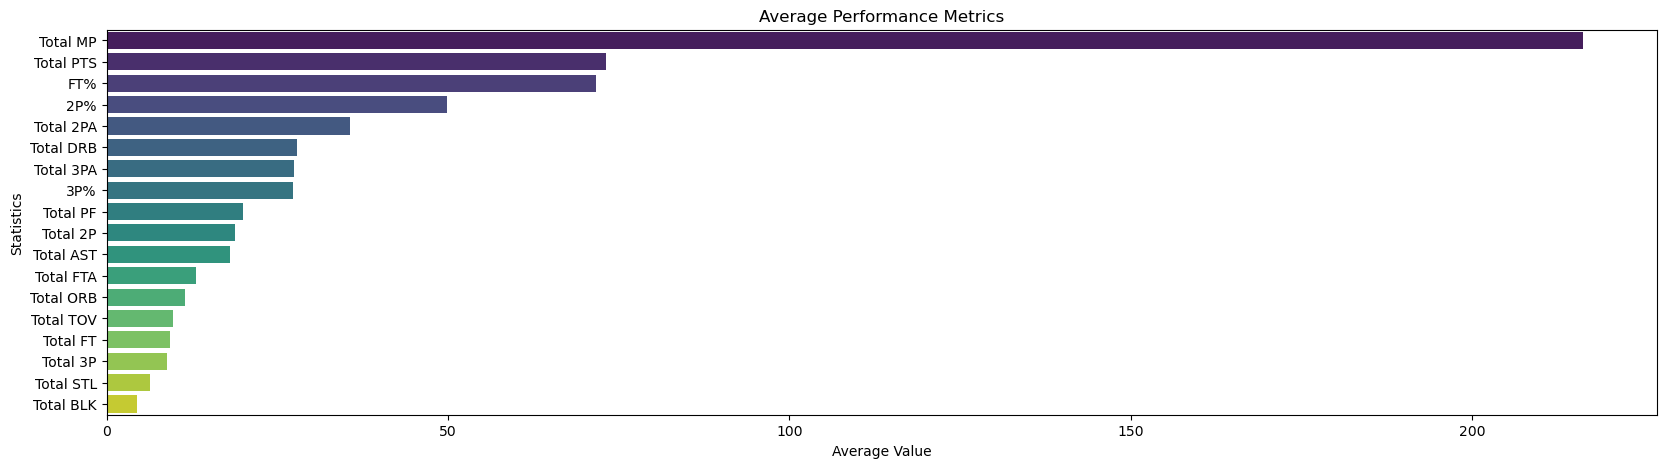

Sorted Stats:
-------------


Total MP     216.259735
Total PTS     73.216814
FT%           71.731517
2P%           49.840289
Total 2PA     35.673894
Total DRB     27.895575
Total 3PA     27.414602
3P%           27.245180
Total PF      19.949558
Total 2P      18.755310
Total AST     18.069469
Total FTA     13.085841
Total ORB     11.546018
Total TOV      9.732301
Total FT       9.332301
Total 3P       8.830088
Total STL      6.297345
Total BLK      4.388938
dtype: float64

Total MP     216.259735
Total PTS     73.216814
FT%           71.731517
2P%           49.840289
Total 2PA     35.673894
Total DRB     27.895575
Total 3PA     27.414602
3P%           27.245180
Total PF      19.949558
Total 2P      18.755310
Total AST     18.069469
Total FTA     13.085841
Total ORB     11.546018
Total TOV      9.732301
Total FT       9.332301
Total 3P       8.830088
Total STL      6.297345
Total BLK      4.388938
dtype: float64

In [5]:
calculate_shooting_efficiency(cluster_0)
plot_sorted_stats(cluster_0)

Cluster 0 can be considered the "The Loser" archetype due to its overall lackluster performance in key areas. Players in this cluster struggle to score, as reflected by their relatively low Total PTS (73.22). Their 3P% (27.25) and Total 3P (8.83) are particularly weak, showcasing a limited ability to contribute from beyond the arc—a critical skill in modern basketball. While their Total 2P (18.76) and FT% (71.73) indicate some efficiency, these numbers are insufficient to compensate for their overall scoring inefficiency. Despite spending significant time on the court (Total MP: 216.26), they fail to contribute meaningfully in areas such as Total DRB (27.90), Total AST (18.07), and Total STL (6.30), highlighting their lack of impact on both ends of the floor. High Total PF (19.95) and Total TOV (9.73) further indicate issues with fouls and turnovers, further diminishing their effectiveness. Overall, the combination of poor offensive and defensive contributions, alongside inefficient use of court time, positions Cluster 0 as the weakest archetype in this analysis.

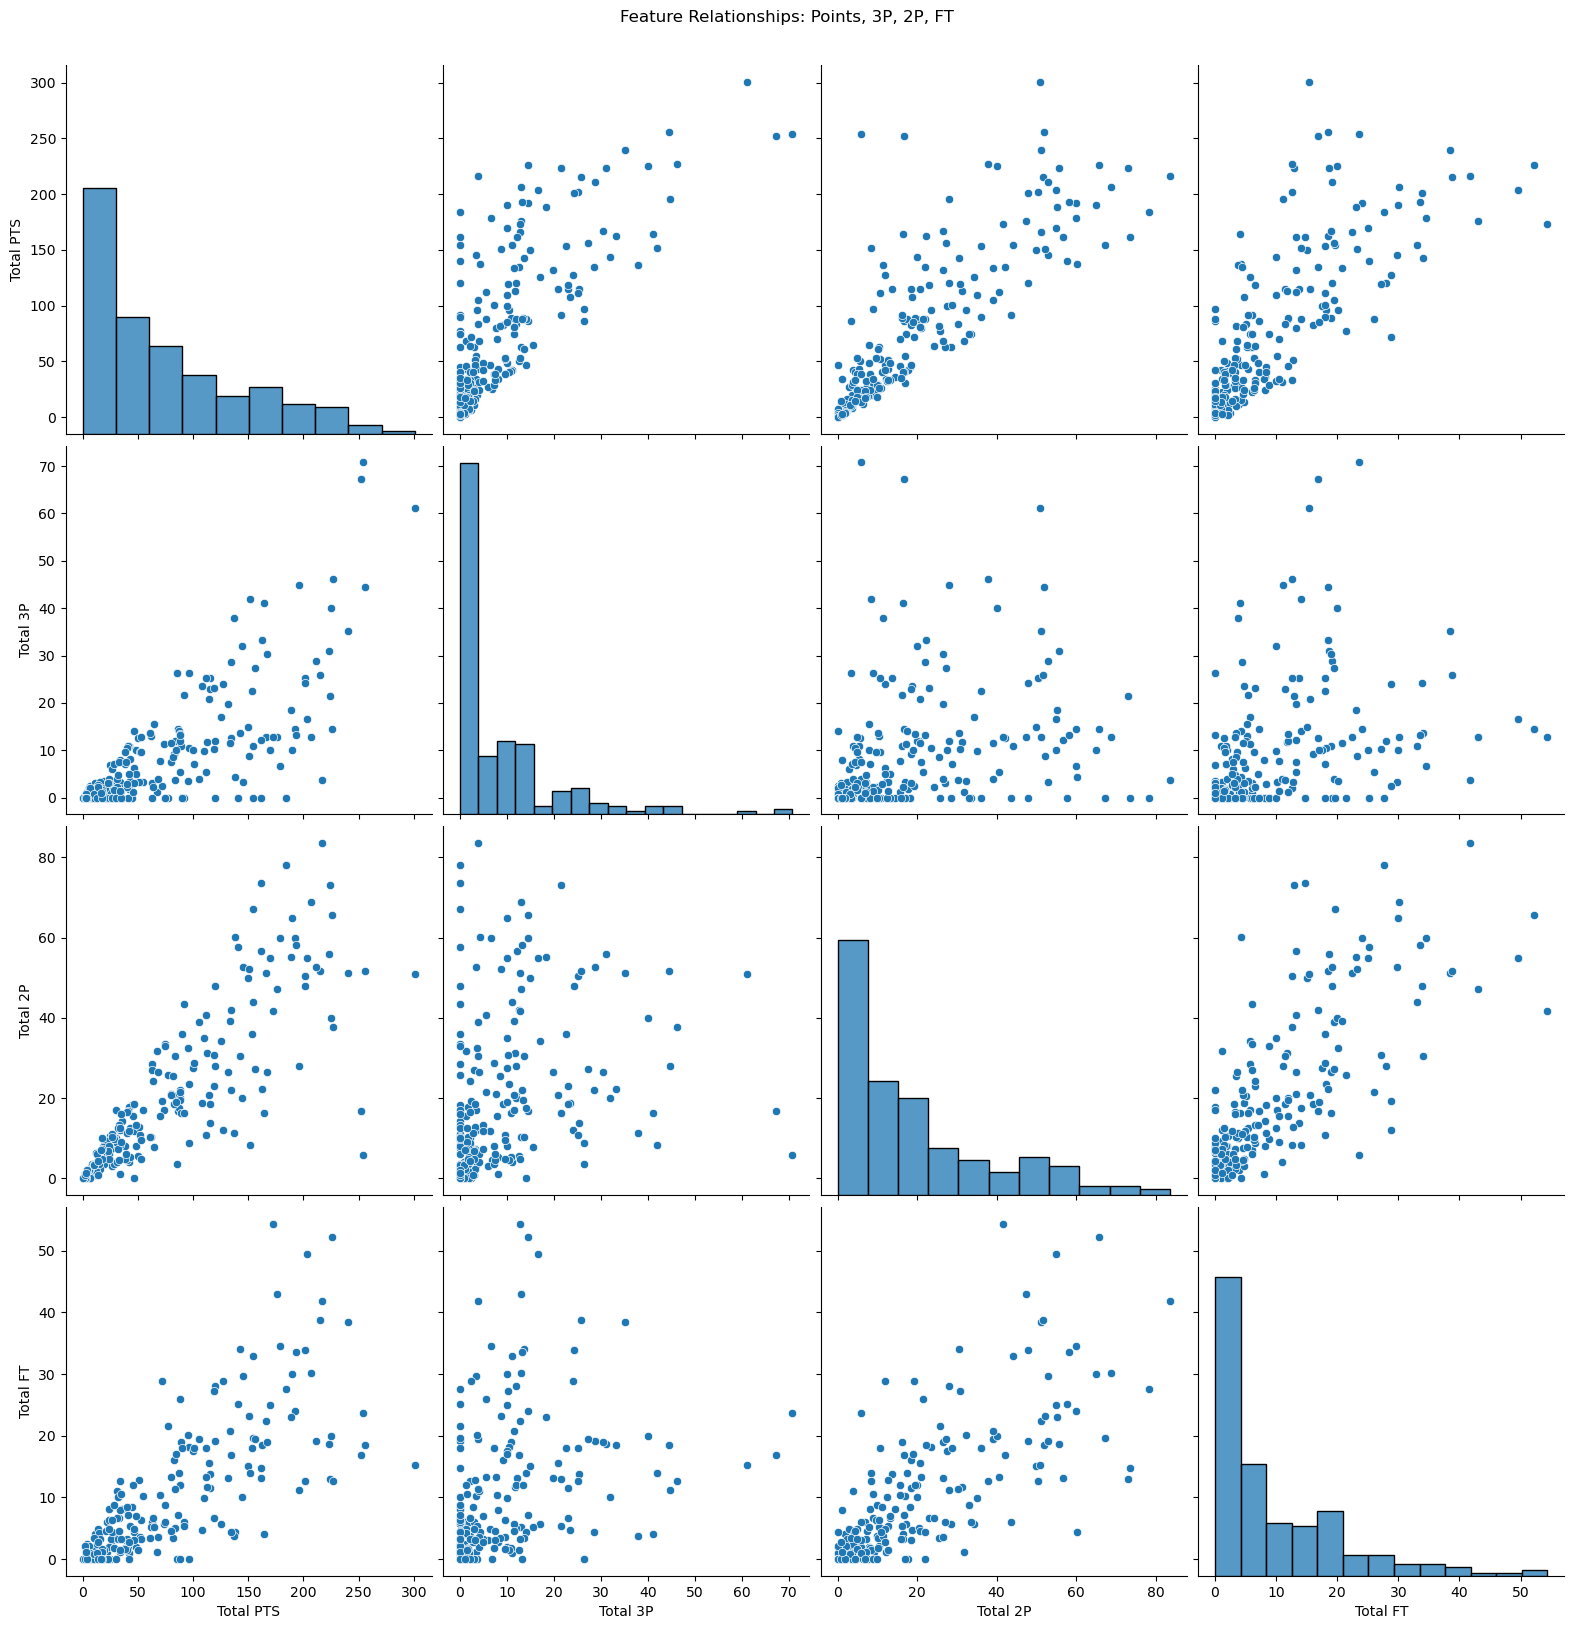

Correlation Coefficients:
-------------------------


,Total PTS,Total 3P,Total 2P,Total FT
Total PTS,1.000000,0.761328,0.844675,0.779840
Total 3P,0.761328,1.000000,0.311081,0.370194
Total 2P,0.844675,0.311081,1.000000,0.761404
Total FT,0.779840,0.370194,0.761404,1.000000


,Total PTS,Total 3P,Total 2P,Total FT
Total PTS,1.000000,0.761328,0.844675,0.779840
Total 3P,0.761328,1.000000,0.311081,0.370194
Total 2P,0.844675,0.311081,1.000000,0.761404
Total FT,0.779840,0.370194,0.761404,1.000000


In [6]:
plot_feature_relationships(cluster_0)

The correlation matrix for Cluster 0 reinforces this classification, revealing a concerning pattern. While Total PTS shows a strong positive correlation with Total 2P (0.84) and Total FT (0.78), the weaker correlation with Total 3P (0.76) suggests that players in this cluster primarily rely on two-point shooting and free throws for scoring, rather than leveraging the three-point shot. The low correlation between Total 3P and Total 2P (0.31) further indicates that these players lack the ability to stretch the floor with three-point shooting, reducing their offensive versatility. The relatively weak correlation between Total FT and Total 3P (0.37) also suggests that they’re not drawing fouls on three-point attempts, limiting their scoring opportunities at the free-throw line. Overall, this correlation data highlights a cluster that relies heavily on traditional scoring methods but struggles to diversify its offense or capitalize on modern trends in basketball.

## Cluster 1 (The Sneaky Sniper Archetype)

- Elite Long-Range Shooting: High Total 3P (174.38) and solid 3P% (37.44%).

- Versatile Scoring: Effective inside with Total 2P (311.10) and 2P% (52.07%).

- Clutch Free-Throws: Strong FT% (83.28%).

- Defensive Impact: High Total STL (72.30), disruptive defensively.

- Playmaking: Notable Total AST (321.95).

- Specialized Role: Lower in rebounds (Total ORB: 63.04) and blocks (Total 

- BLK: 38.94), but impactful in scoring and defense.

In [7]:
display(cluster_1)

,Player Name,Archetype,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
0,Alec Burks,1,2427.9,249.6,657.9,171.3,477.2,288.6,330.5,50.5,252.2,175.3,54.8,26.1,92.4,148.6,1377.7
1,Austin Reaves,1,2632.2,155.8,418.2,303.4,516.6,229.6,270.6,57.4,295.2,451.0,65.6,24.6,172.2,155.8,1303.8
2,Bogdan Bogdanovi?,1,2401.6,237.0,639.9,229.1,458.2,150.1,165.9,55.3,221.2,244.9,94.8,23.7,110.6,181.7,1335.1
3,Bojan Bogdanovi?,1,2954.3,264.3,671.1,352.5,693.7,235.7,298.2,45.5,261.6,193.0,56.7,8.5,204.7,190.6,1733.6
4,Brandon Ingram,1,2105.6,83.2,243.2,416.0,774.4,243.2,307.2,44.8,281.6,364.8,51.2,38.4,160.0,147.2,1331.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Stephen Curry,1,2419.8,355.2,873.2,296.0,569.8,296.0,325.6,37.0,296.0,377.4,51.8,29.6,207.2,118.4,1953.6
57,Tobias Harris,1,2366.0,91.0,259.0,371.0,693.0,189.0,210.0,77.0,371.0,217.0,70.0,49.0,91.0,112.0,1204.0
58,Trae Young,1,1944.0,172.8,469.8,259.2,540.0,345.6,405.0,21.6,124.2,583.2,70.2,10.8,237.6,108.0,1387.8
59,Tyrese Haliburton,1,2221.8,193.2,538.2,303.6,510.6,193.2,227.7,34.5,234.6,752.1,82.8,48.3,158.7,75.9,1386.9


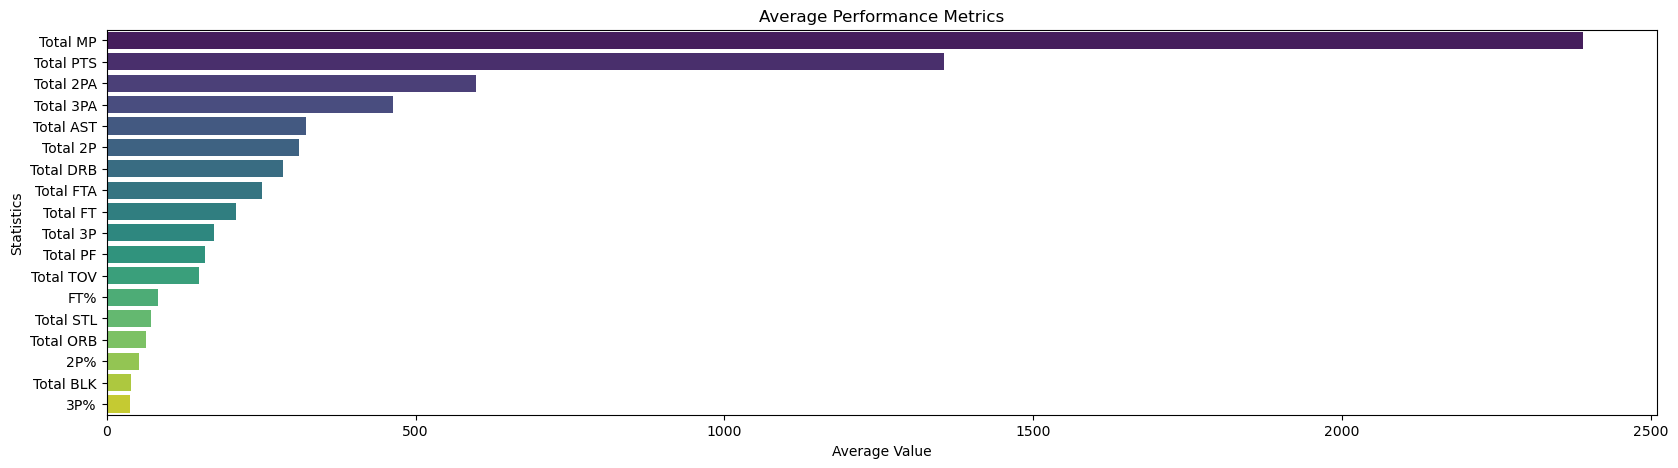

Sorted Stats:
-------------


Total MP     2389.454098
Total PTS    1356.032787
Total 2PA     597.345902
Total 3PA     463.377049
Total AST     321.947541
Total 2P      311.104918
Total DRB     285.050820
Total FTA     251.519672
Total FT      209.847541
Total 3P      174.380328
Total PF      159.062295
Total TOV     148.677049
FT%            83.276253
Total STL      72.298361
Total ORB      63.037705
2P%            51.884484
Total BLK      38.939344
3P%            37.440057
dtype: float64

Total MP     2389.454098
Total PTS    1356.032787
Total 2PA     597.345902
Total 3PA     463.377049
Total AST     321.947541
Total 2P      311.104918
Total DRB     285.050820
Total FTA     251.519672
Total FT      209.847541
Total 3P      174.380328
Total PF      159.062295
Total TOV     148.677049
FT%            83.276253
Total STL      72.298361
Total ORB      63.037705
2P%            51.884484
Total BLK      38.939344
3P%            37.440057
dtype: float64

In [8]:
calculate_shooting_efficiency(cluster_1)
plot_sorted_stats(cluster_1)

Cluster 1, dubbed the "Sneaky Sniper," is defined by players who excel both offensively and defensively. These players are exceptional long-range shooters, with a high Total 3P (174.38) and solid 3P% (37.44%), making them constant threats from beyond the arc. Alongside their shooting prowess, they also maintain an effective inside game, as demonstrated by their Total 2P (311.10) and Total 2PA (597.35), showcasing their versatility in scoring. Their FT% (83.28%) further highlights their ability to capitalize on free-throw opportunities when needed. On the defensive side, they stand out for their Total STL (72.30), reflecting their ability to disrupt the opposing offense through steals. The combination of sharp shooting, effective inside play, and a knack for creating turnovers makes them valuable contributors on both ends of the floor. Additionally, their Total AST (321.95) underscores their playmaking ability, allowing them to facilitate the offense as well as score. While they may not be leaders in rebounds (Total ORB: 63.04) or blocks (Total BLK: 38.94), their overall impact comes from their scoring versatility and defensive disruptions.

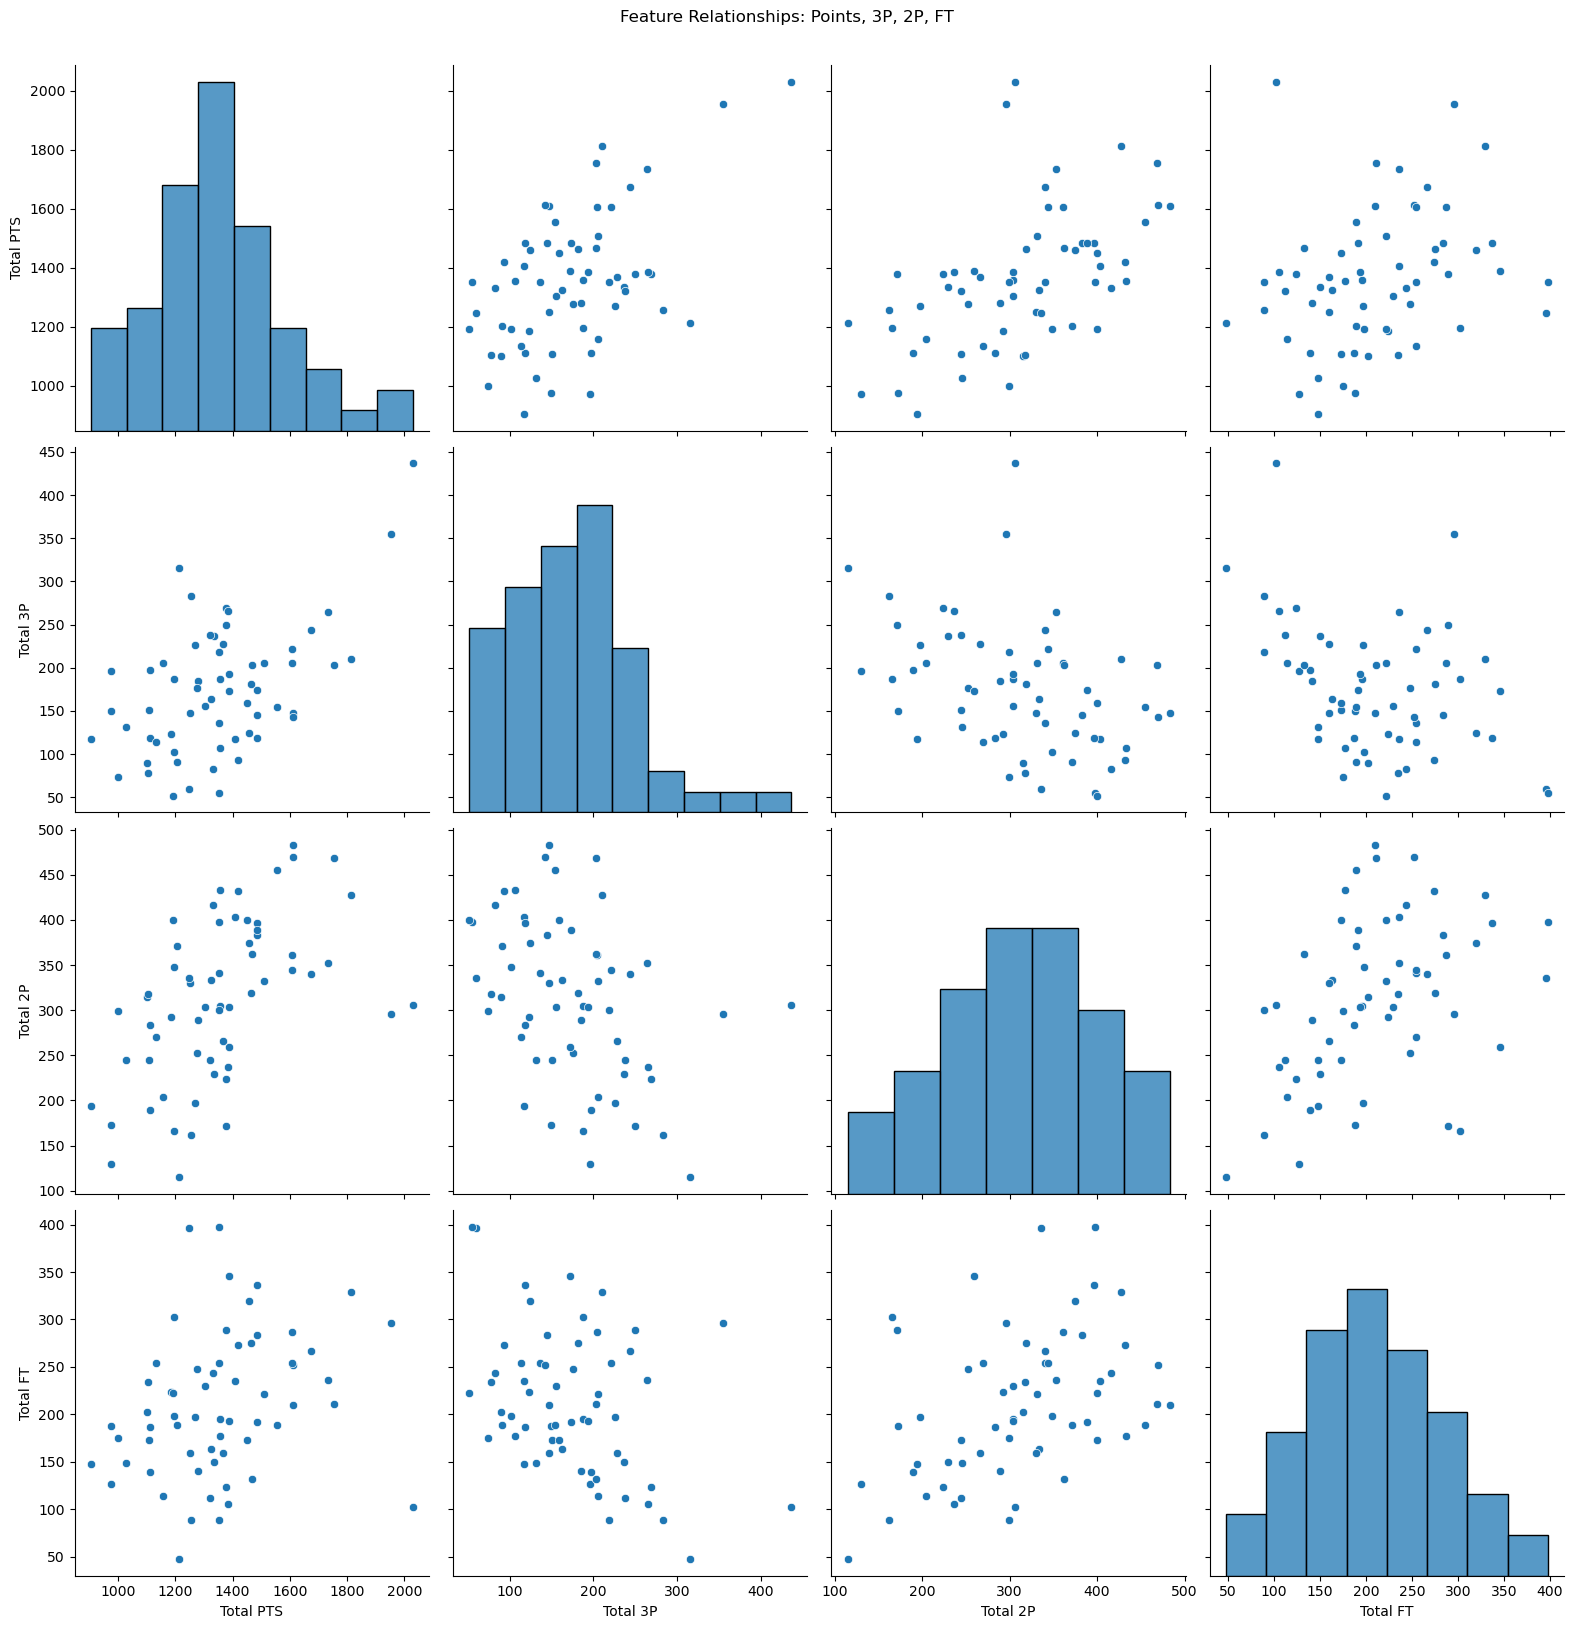

Correlation Coefficients:
-------------------------


,Total PTS,Total 3P,Total 2P,Total FT
Total PTS,1.000000,0.524285,0.530015,0.274518
Total 3P,0.524285,1.000000,-0.394514,-0.390602
Total 2P,0.530015,-0.394514,1.000000,0.417980
Total FT,0.274518,-0.390602,0.417980,1.000000


,Total PTS,Total 3P,Total 2P,Total FT
Total PTS,1.000000,0.524285,0.530015,0.274518
Total 3P,0.524285,1.000000,-0.394514,-0.390602
Total 2P,0.530015,-0.394514,1.000000,0.417980
Total FT,0.274518,-0.390602,0.417980,1.000000


In [9]:
plot_feature_relationships(cluster_1)

The correlation matrix for Cluster 1 reinforces this dynamic profile. Despite a modest correlation between Total 3P and Total PTS (0.52), their long-range shooting remains a significant contributor to their total points. The strong positive correlation between Total 2P and Total PTS (0.53) further emphasizes their ability to score efficiently inside, adding balance to their offensive game. However, the negative correlation between Total 3P and Total FT (-0.39) suggests that these players may not rely as heavily on drawing fouls or converting free throws but instead prefer to score through other methods, such as long-range shooting or driving to the basket. With the ability to score from both inside and beyond the arc, players in this cluster offer a versatile and unpredictable offensive presence, while their defensive tenacity through steals adds significant value to their overall impact.

## Cluster 2 (The Substutute Archetype)

- Limited Minutes, Effective Play: Lower playing time (1065.95 MP) but solid scoring output (389.83 PTS), maximizing impact in fewer minutes.

- Balanced Scoring: Reliable inside scoring (95.26 2P, 2P%: 53.87%) and a modest yet effective three-point presence (49.59 3P, 33.36%).

- Free-Throw Efficiency: Effective at the line (FTA: 67.69, FT%: 74.95%), adding scoring consistency during limited opportunities.

- Role Player: Provides dependable contributions without being a primary focus of the offense, excelling in specific, situational roles.

In [10]:
display(cluster_2)

,Player Name,Archetype,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
0,Aaron Holiday,2,1271.4,85.8,218.4,101.4,202.8,54.6,62.4,23.4,101.4,140.4,39.0,7.8,54.6,124.8,514.8
1,Aaron Wiggins,2,1224.6,62.4,124.8,148.2,249.6,54.6,70.2,62.4,124.8,85.8,54.6,15.6,54.6,93.6,538.2
2,Aleksej Pokusevski,2,811.6,35.0,110.2,61.6,133.4,61.6,83.8,33.2,145.6,72.0,29.4,27.6,38.8,43.6,290.8
3,Amir Coffey,2,1463.0,70.0,182.0,98.0,168.0,63.0,70.0,28.0,119.0,77.0,42.0,14.0,35.0,105.0,462.0
4,Anthony Black,2,1166.1,34.5,96.6,75.9,151.8,48.3,82.8,34.5,103.5,89.7,34.5,20.7,55.2,110.4,317.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Wendell Carter Jr.,2,1408.0,66.0,170.5,159.5,253.0,93.5,132.0,110.0,269.5,93.5,33.0,27.5,66.0,121.0,605.0
132,Yuta Watanabe,2,927.2,48.0,170.4,33.6,62.8,18.9,33.5,21.8,88.0,27.3,25.3,12.6,40.8,77.2,233.0
133,Zach LaVine,2,872.5,60.0,170.0,110.0,207.5,87.5,102.5,7.5,120.0,97.5,20.0,7.5,52.5,57.5,487.5
134,Zeke Nnaji,2,574.2,5.8,23.2,63.8,127.6,40.6,63.8,63.8,63.8,34.8,17.4,40.6,29.0,81.2,185.6


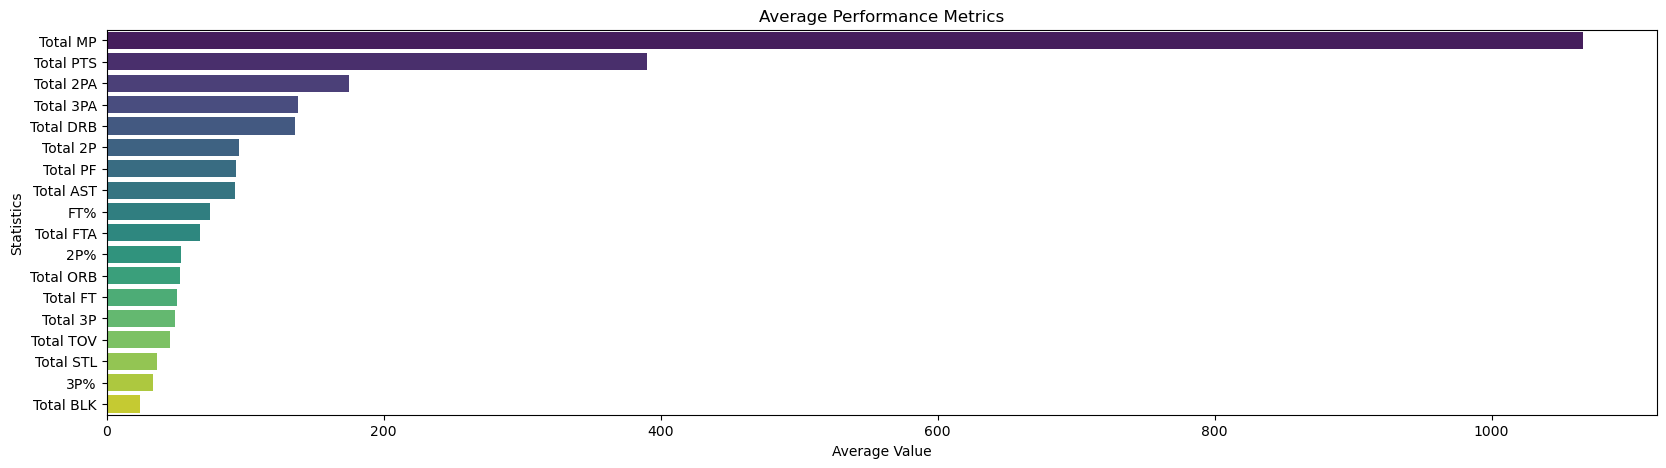

Sorted Stats:
-------------


Total MP     1065.945588
Total PTS     389.830882
Total 2PA     174.958824
Total 3PA     137.987500
Total DRB     136.164706
Total 2P       95.257353
Total PF       93.421324
Total AST      93.019118
FT%            74.950218
Total FTA      67.689706
2P%            53.869936
Total ORB      52.675735
Total FT       50.447059
Total 3P       49.591176
Total TOV      45.733824
Total STL      36.366912
3P%            33.360505
Total BLK      23.992647
dtype: float64

Total MP     1065.945588
Total PTS     389.830882
Total 2PA     174.958824
Total 3PA     137.987500
Total DRB     136.164706
Total 2P       95.257353
Total PF       93.421324
Total AST      93.019118
FT%            74.950218
Total FTA      67.689706
2P%            53.869936
Total ORB      52.675735
Total FT       50.447059
Total 3P       49.591176
Total TOV      45.733824
Total STL      36.366912
3P%            33.360505
Total BLK      23.992647
dtype: float64

In [11]:
calculate_shooting_efficiency(cluster_2)
plot_sorted_stats(cluster_2)

Cluster 2, which we will call "The Substitute," represents players who primarily contribute in limited minutes but are still valuable for specific roles. With an average Total MP (1065.95), these players spend significantly less time on the court compared to other clusters, yet they manage to produce a solid Total PTS (389.83) during their playing time. Their Total 3P (49.59) and 3P% (33.36%) suggest they have a reliable long-range shot, although their contribution from beyond the arc is more modest compared to other clusters. These players also show efficiency in Total 2P (95.26) and a solid 2P% (53.87%), providing a balanced scoring threat when inside. Their ability to draw free throws is reflected in their Total FTA (67.69) and FT% (74.95%), making them effective at getting to the line and capitalizing on opportunities. Although not a primary offensive focus, they play an important role as reliable scoring substitutes, contributing when called upon.

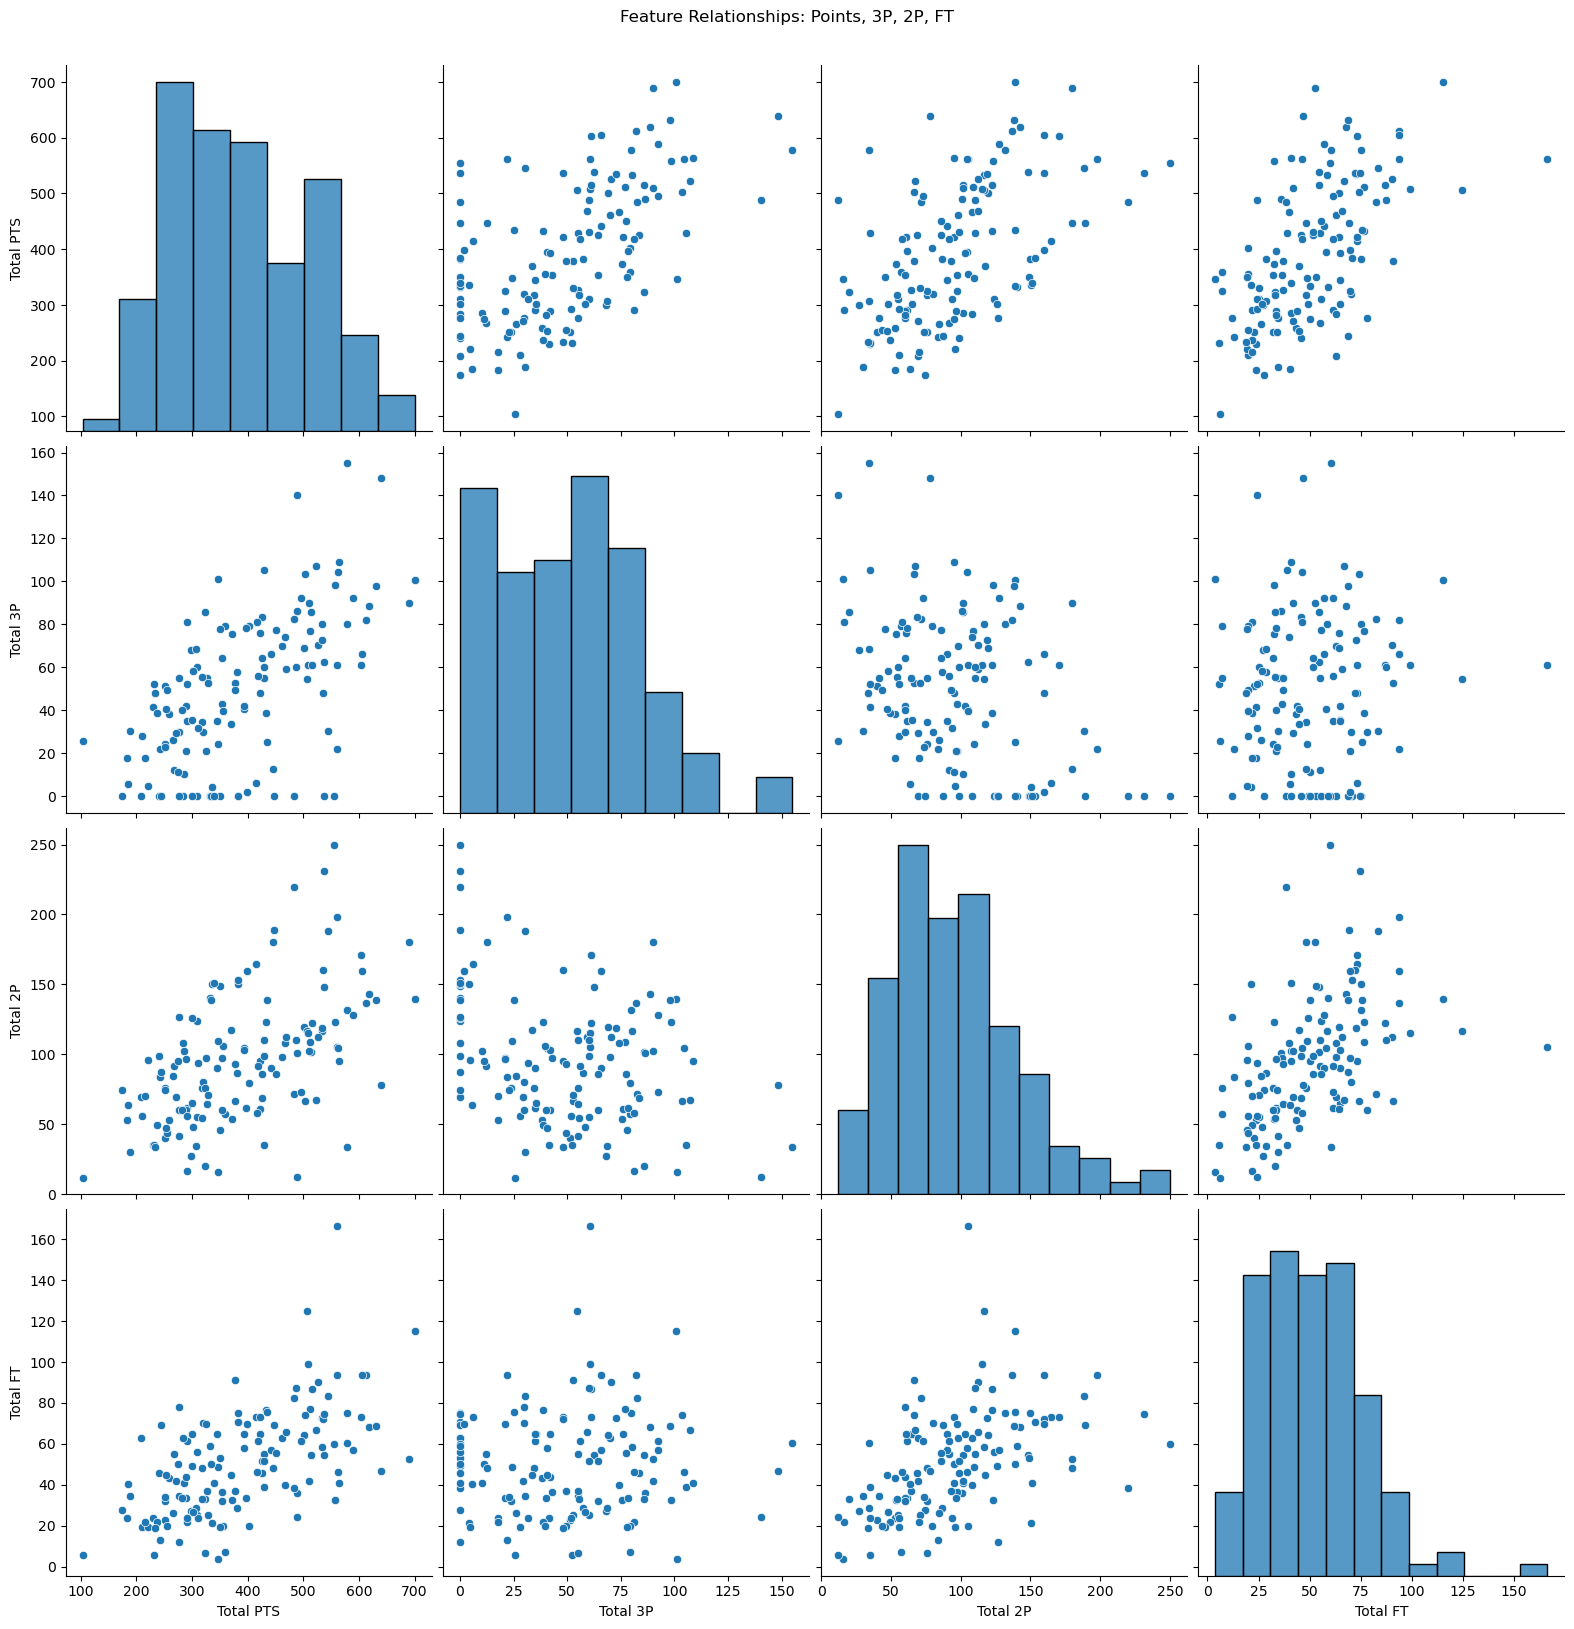

Correlation Coefficients:
-------------------------


,Total PTS,Total 3P,Total 2P,Total FT
Total PTS,1.000000,0.581167,0.551385,0.594610
Total 3P,0.581167,1.000000,-0.337301,0.043941
Total 2P,0.551385,-0.337301,1.000000,0.489747
Total FT,0.594610,0.043941,0.489747,1.000000


,Total PTS,Total 3P,Total 2P,Total FT
Total PTS,1.000000,0.581167,0.551385,0.594610
Total 3P,0.581167,1.000000,-0.337301,0.043941
Total 2P,0.551385,-0.337301,1.000000,0.489747
Total FT,0.594610,0.043941,0.489747,1.000000


In [12]:
plot_feature_relationships(cluster_2)

The correlation matrix for Cluster 2 highlights several key patterns that reinforce the idea of these players as dependable role players. The moderate positive correlation between Total PTS and Total 3P (0.58) indicates that their scoring is significantly supported by their ability to hit three-pointers, even if it’s not their primary contribution. The Total 2P and Total PTS correlation (0.55) suggests that they are also effective when driving to the basket or making inside shots. The relatively weak correlation between Total 3P and Total FT (0.04) implies that these players are not particularly adept at drawing fouls from three-point attempts, which may limit their ability to get easy points at the free-throw line. Nevertheless, their solid ability to convert both inside shots and free throws when needed, combined with their reasonable three-point shooting, makes them effective as bench players who can step in and contribute without being heavily relied upon.

## Cluster 3 (The Helping Hand Archetype)

- Balanced Contributor: Solid all-around stats without specializing in any single category; moderate playing time (1921.82 MP).

- Scoring Support: Contributes efficiently in close-range scoring (2P%: 53.91%) and occasional three-point shooting (3P%: 35.87%).

- Playmaking & Defense: Significant defensive rebounding (233.27 DRB) and assists (198.30 AST), aiding both ends of the court.

- Free-Throw Reliability: Capitalizes on opportunities at the line (FT%: 78.23%).

In [13]:
display(cluster_3)

,Player Name,Archetype,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
0,Aaron Nesmith,3,1994.4,136.8,331.2,172.8,302.4,108.0,136.8,64.8,208.8,108.0,64.8,50.4,64.8,237.6,878.4
1,Al Horford,3,1742.0,110.5,260.0,104.0,162.5,26.0,32.5,84.5,331.5,169.0,39.0,65.0,45.5,91.0,559.0
2,Alex Caruso,3,2037.7,134.9,333.7,113.6,205.9,71.0,99.4,63.9,213.0,248.5,120.7,71.0,99.4,177.5,717.1
3,Amen Thompson,3,1388.8,6.2,55.8,229.4,390.6,105.4,155.0,148.8,260.4,161.2,80.6,37.2,93.0,142.6,589.0
4,Andrew Nembhard,3,1700.0,61.2,170.0,197.2,353.6,47.6,54.4,34.0,102.0,278.8,61.2,6.8,102.0,142.8,625.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Tyus Jones,3,1933.8,105.6,257.4,217.8,409.2,33.0,39.6,19.8,158.4,481.8,72.6,19.8,66.0,46.2,792.0
90,Vasilije Mici?,3,2352.0,87.0,309.0,231.0,432.0,123.0,153.0,24.0,147.0,525.0,60.0,12.0,201.0,132.0,843.0
91,Vince Williams Jr.,3,1435.2,78.0,208.0,88.4,171.6,104.0,130.0,57.2,228.8,176.8,46.8,36.4,93.6,135.2,520.0
92,Xavier Tillman Sr.,3,1946.4,43.2,163.4,203.4,397.6,42.6,100.8,138.6,282.4,153.4,99.4,87.2,69.0,152.8,570.2


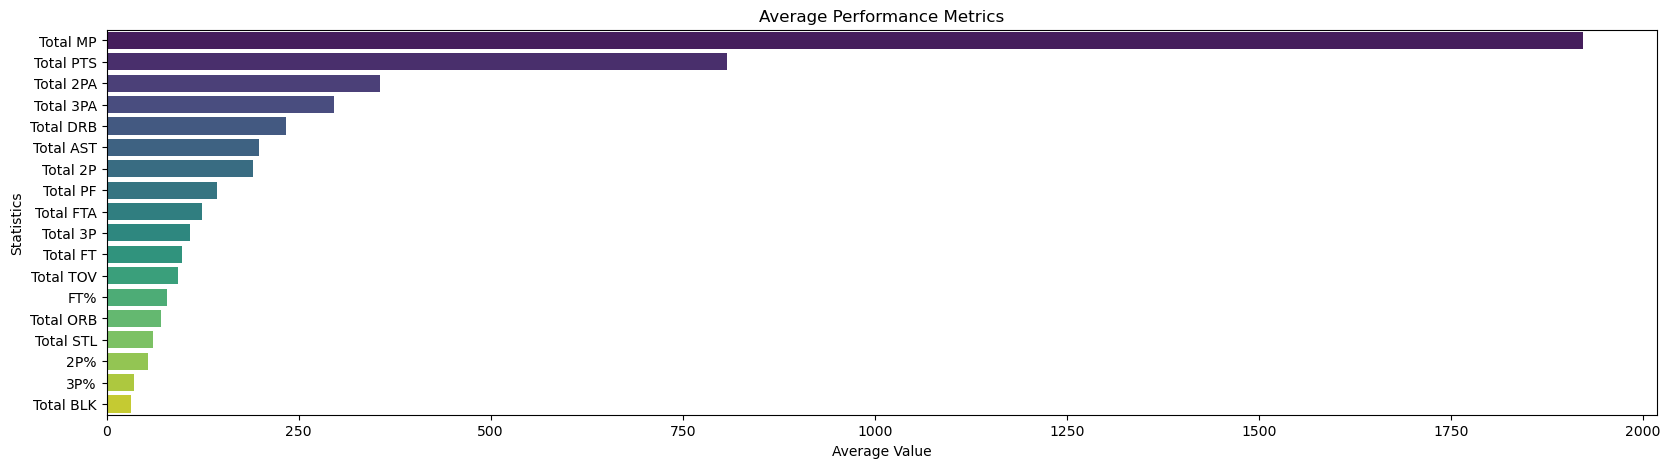

Sorted Stats:
-------------


Total MP     1921.815957
Total PTS     807.288298
Total 2PA     356.503191
Total 3PA     296.586170
Total DRB     233.270213
Total AST     198.300000
Total 2P      190.748936
Total PF      143.552128
Total FTA     124.548936
Total 3P      109.040426
Total FT       97.600000
Total TOV      92.491489
FT%            78.231265
Total ORB      70.510638
Total STL      60.224468
2P%            53.912787
3P%            35.868820
Total BLK      31.655319
dtype: float64

Total MP     1921.815957
Total PTS     807.288298
Total 2PA     356.503191
Total 3PA     296.586170
Total DRB     233.270213
Total AST     198.300000
Total 2P      190.748936
Total PF      143.552128
Total FTA     124.548936
Total 3P      109.040426
Total FT       97.600000
Total TOV      92.491489
FT%            78.231265
Total ORB      70.510638
Total STL      60.224468
2P%            53.912787
3P%            35.868820
Total BLK      31.655319
dtype: float64

In [14]:
calculate_shooting_efficiency(cluster_3)
plot_sorted_stats(cluster_3)

Cluster 3, which we’ll call "The Helping Hand," consists of players who show solid all-around contributions but don’t necessarily excel in any one area. With an average Total MP (1921.82), these players spend a decent amount of time on the court, and their Total PTS (807.29) shows that they can score efficiently when needed. Their Total 2P (190.75) and 2P% (53.91%) suggest they are efficient finishers inside the paint, though they are less focused on long-range shooting, as shown by their Total 3P (109.04) and 3P% (35.87%). What truly defines this archetype, however, is their ability to contribute defensively and as playmakers. With a strong Total DRB (233.27) and Total AST (198.30), they are consistently involved in both securing defensive rebounds and setting up offensive plays. They also have solid Total FT (97.60) and a respectable FT% (78.23%), indicating that they capitalize on free-throw opportunities when given the chance. While not necessarily elite in any single category, players in the "Helping Hand" archetype excel at supporting their teams through steady contributions in scoring, defense, and playmaking.

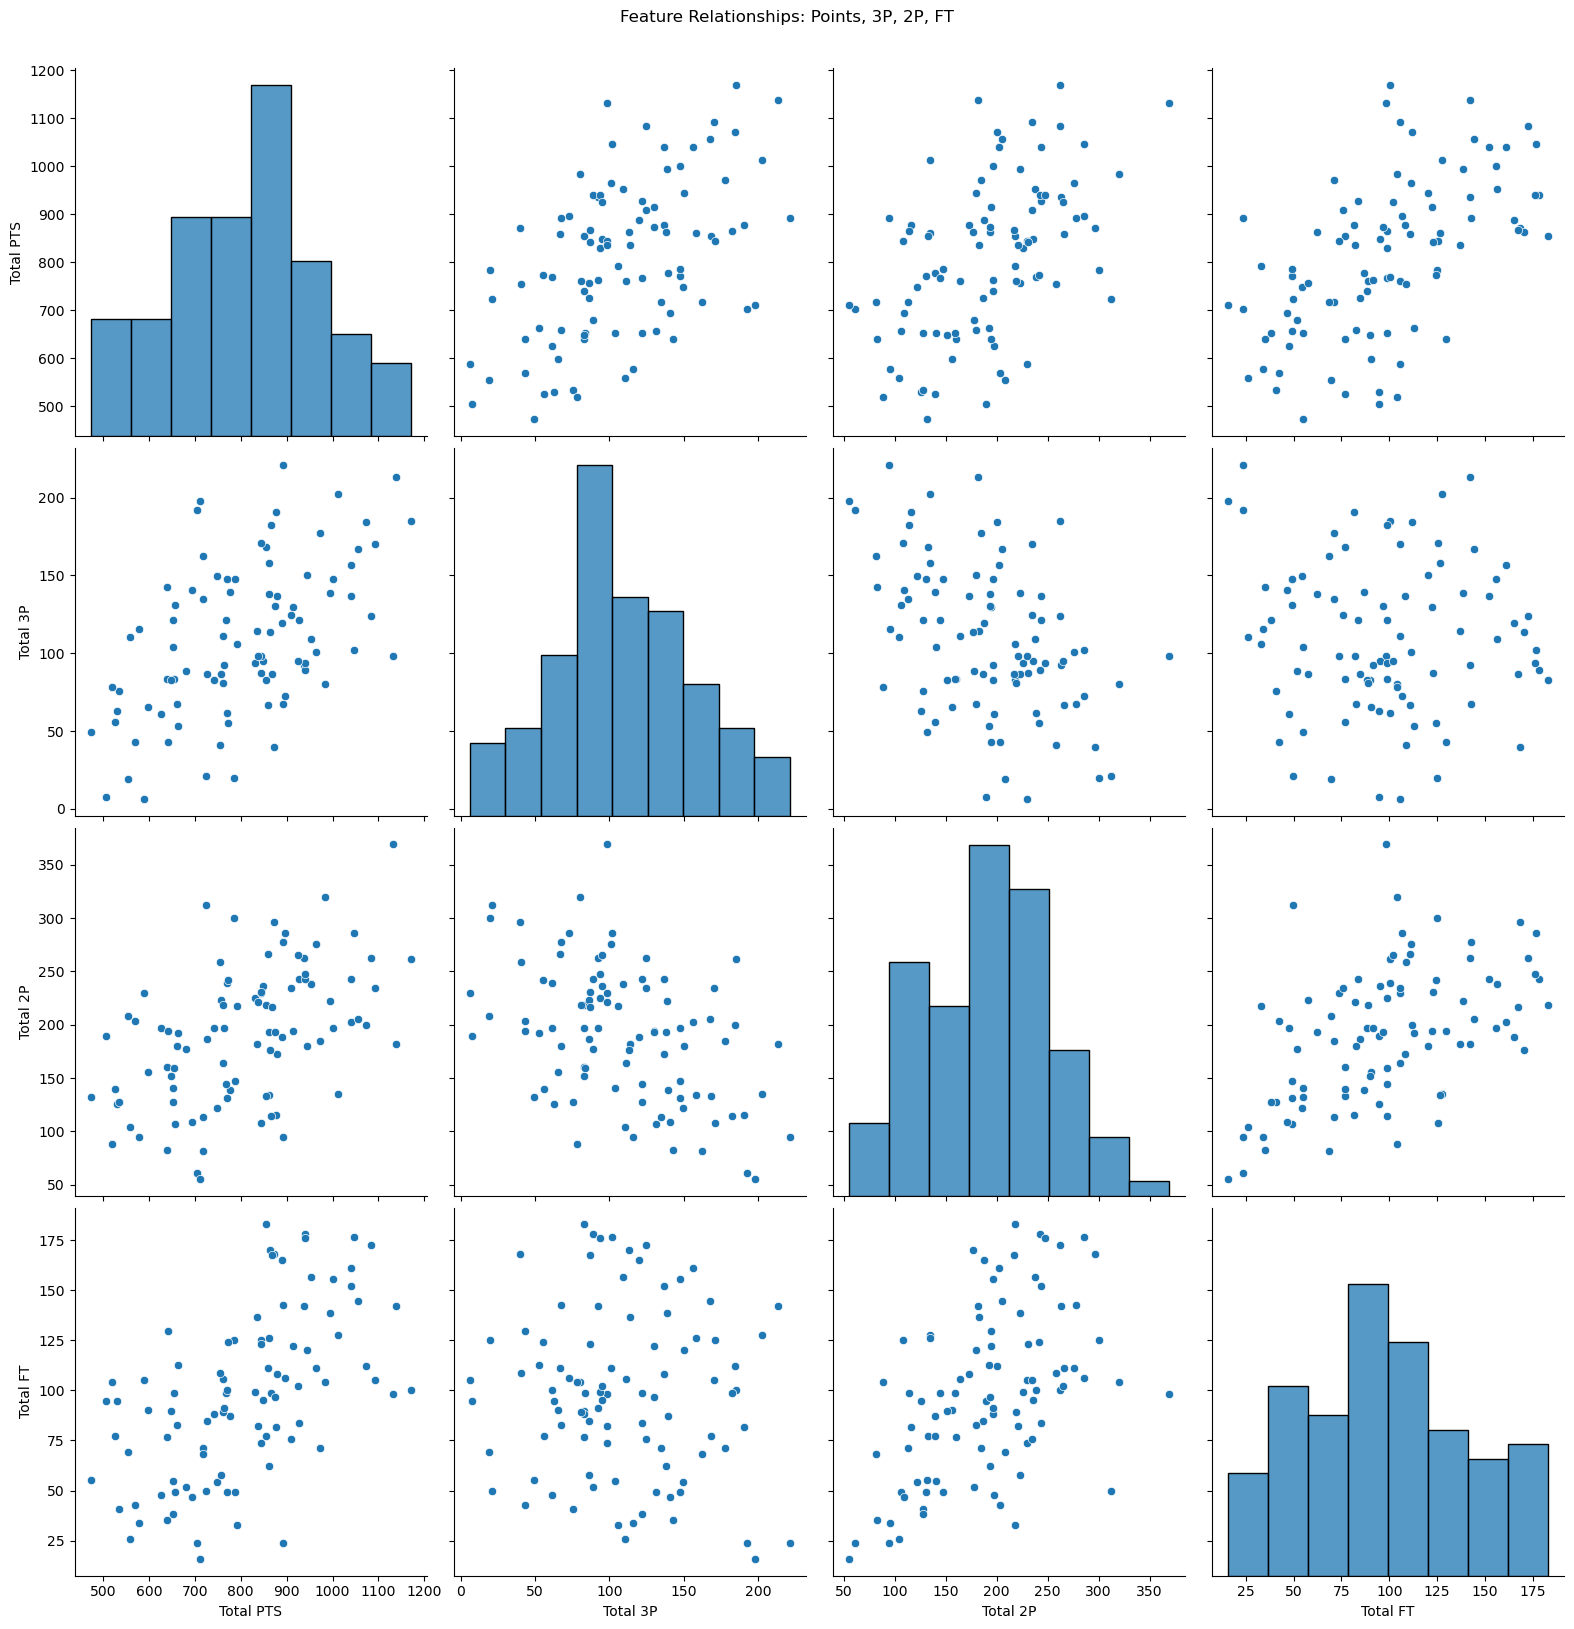

Correlation Coefficients:
-------------------------


,Total PTS,Total 3P,Total 2P,Total FT
Total PTS,1.000000,0.518597,0.507079,0.569843
Total 3P,0.518597,1.000000,-0.447624,-0.083643
Total 2P,0.507079,-0.447624,1.000000,0.506750
Total FT,0.569843,-0.083643,0.506750,1.000000


,Total PTS,Total 3P,Total 2P,Total FT
Total PTS,1.000000,0.518597,0.507079,0.569843
Total 3P,0.518597,1.000000,-0.447624,-0.083643
Total 2P,0.507079,-0.447624,1.000000,0.506750
Total FT,0.569843,-0.083643,0.506750,1.000000


In [15]:
plot_feature_relationships(cluster_3)

The correlation matrix for Cluster 3 further highlights the balanced, yet unspectacular, performance of this archetype. The positive correlations between Total PTS and both Total 2P (0.51) and Total FT (0.57) show that these players’ scoring comes from a combination of inside shooting and free-throw opportunities. However, the negative correlation between Total 3P and Total 2P (-0.45) indicates that they are not particularly reliant on three-point shooting, preferring to contribute more in mid-range and close-range scoring. The modest correlation between Total 3P and Total PTS (0.52) suggests that three-pointers are an important, though secondary, aspect of their scoring game. Their ability to contribute consistently in other areas, like Total DRB and Total AST, reinforces the idea that the "Helping Hand" archetype thrives through its well-rounded, team-first approach, providing defensive stability and facilitating offense without being a primary scoring threat.

## Cluster 4 (The Rebounder Archetype)

- Elite Rebounding: Dominates defensive (472.82) and offensive boards (207.94), creating second-chance opportunities.

- Interior Strength: Excels in shot-blocking (111.02) and efficient scoring near the basket (2P%: 60.67).

- Efficient Scoring: Solid free-throw contribution (FT%: 72.70%) but minimal three-point impact (3P%: 27.15%).

- Durable & Reliable: Significant playing time (2143.33 MP) with consistent impact.

- Versatile Support: Contributes moderately as a playmaker (162.19 AST).

In [16]:
display(cluster_4)

,Player Name,Archetype,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
0,Aaron Gordon,4,2299.5,36.5,138.7,357.7,576.7,175.2,270.1,175.2,299.3,255.5,58.4,43.8,102.2,138.7,1014.7
1,Alperen Sengun,4,2047.5,31.5,113.4,491.4,869.4,245.7,352.8,182.7,403.2,315.0,75.6,44.1,163.8,207.9,1329.3
2,Andre Drummond,4,1350.9,0.0,0.0,268.6,474.0,126.4,221.2,268.6,442.4,39.5,71.1,47.4,79.0,142.2,663.6
3,Anthony Davis,4,2698.0,30.4,106.4,684.0,1178.0,418.0,516.8,235.6,722.0,266.0,91.2,174.8,159.6,174.8,1877.2
4,Bam Adebayo,4,2414.0,14.2,42.6,518.3,972.7,291.1,390.5,156.2,575.1,276.9,78.1,63.9,163.3,156.2,1370.3
5,Brook Lopez,4,2409.5,150.1,402.9,221.2,347.6,110.6,134.3,118.5,292.3,126.4,39.5,189.6,79.0,189.6,987.5
6,Chet Holmgren,4,2410.8,131.2,352.6,377.2,606.8,221.4,278.8,131.2,516.6,196.8,49.2,188.6,131.2,196.8,1353.0
7,Clint Capela,4,1883.4,0.0,0.0,350.4,620.5,131.4,204.4,335.8,438.0,87.6,43.8,109.5,73.0,160.6,839.5
8,Daniel Gafford,4,3629.0,0.0,0.0,695.3,959.1,238.7,349.7,386.7,735.8,232.3,131.9,309.5,148.0,459.1,1629.3
9,Daniel Theis,4,2030.9,47.6,143.8,262.8,443.3,71.4,95.2,166.6,321.3,119.0,47.6,107.1,83.3,250.9,751.7


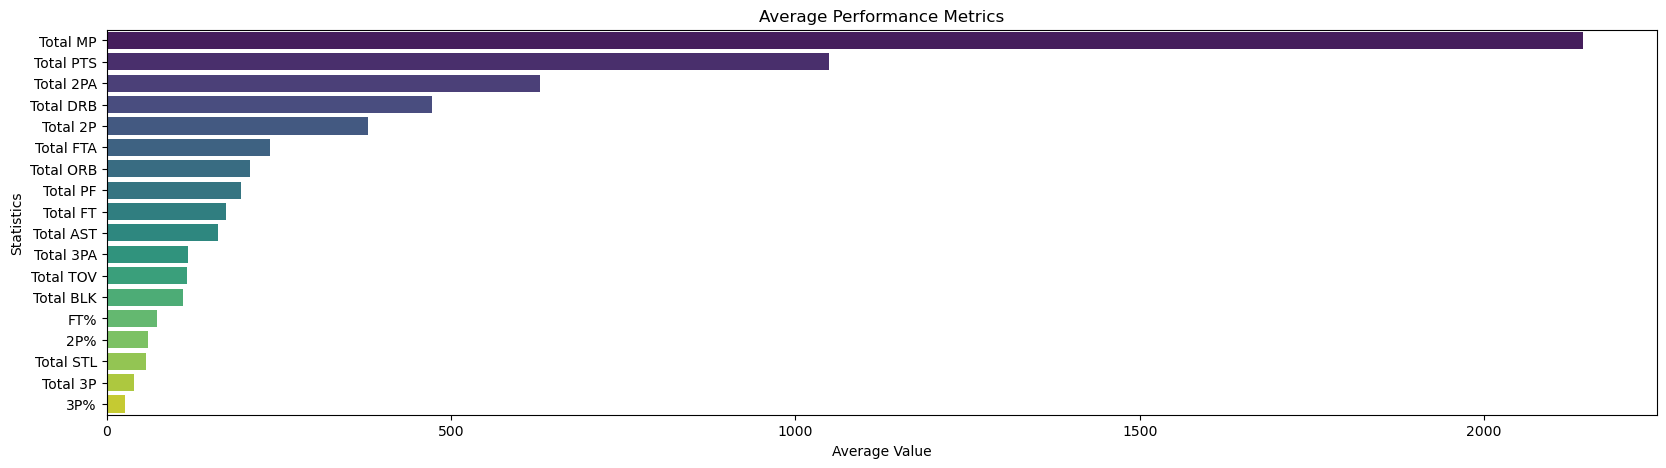

Sorted Stats:
-------------


Total MP     2143.327586
Total PTS    1048.217241
Total 2PA     629.775862
Total DRB     472.824138
Total 2P      378.951724
Total FTA     237.600000
Total ORB     207.944828
Total PF      195.327586
Total FT      172.941379
Total AST     162.186207
Total 3PA     117.593103
Total TOV     116.368966
Total BLK     111.017241
FT%            72.699319
2P%            60.666563
Total STL      57.200000
Total 3P       39.362069
3P%            27.152706
dtype: float64

Total MP     2143.327586
Total PTS    1048.217241
Total 2PA     629.775862
Total DRB     472.824138
Total 2P      378.951724
Total FTA     237.600000
Total ORB     207.944828
Total PF      195.327586
Total FT      172.941379
Total AST     162.186207
Total 3PA     117.593103
Total TOV     116.368966
Total BLK     111.017241
FT%            72.699319
2P%            60.666563
Total STL      57.200000
Total 3P       39.362069
3P%            27.152706
dtype: float64

In [17]:
calculate_shooting_efficiency(cluster_4)
plot_sorted_stats(cluster_4)

Cluster 4, which we’ll call "The Rebounder," is characterized by players who dominate both offensive and defensive rebounds, making them invaluable to their teams for second-chance opportunities and defensive stability. With a high Total MP (2143.33), these players spend significant time on the floor, contributing heavily across multiple facets of the game. Their impressive Total DRB (472.82) and Total ORB (207.94) indicate they are consistently involved in securing rebounds, a key aspect of their game. In addition to their rebounding prowess, they also excel in shot-blocking, with a notable Total BLK (111.02), further enhancing their defensive value. While their Total PTS (1048.22) may not be as high as some other archetypes, they make up for it with strong Total 2P (378.95) and 2P% (60.67%), reflecting their efficiency around the basket. Their Total FT (172.94) and FT% (72.70%) show that they can capitalize on opportunities at the free-throw line, especially when they draw fouls from their aggressive playstyle. Though they are not major three-point threats, with Total 3P (39.36) and 3P% (27.15%), their ability to control the paint and protect the rim sets them apart as one of the most valuable players in terms of physicality and presence on both ends of the court.

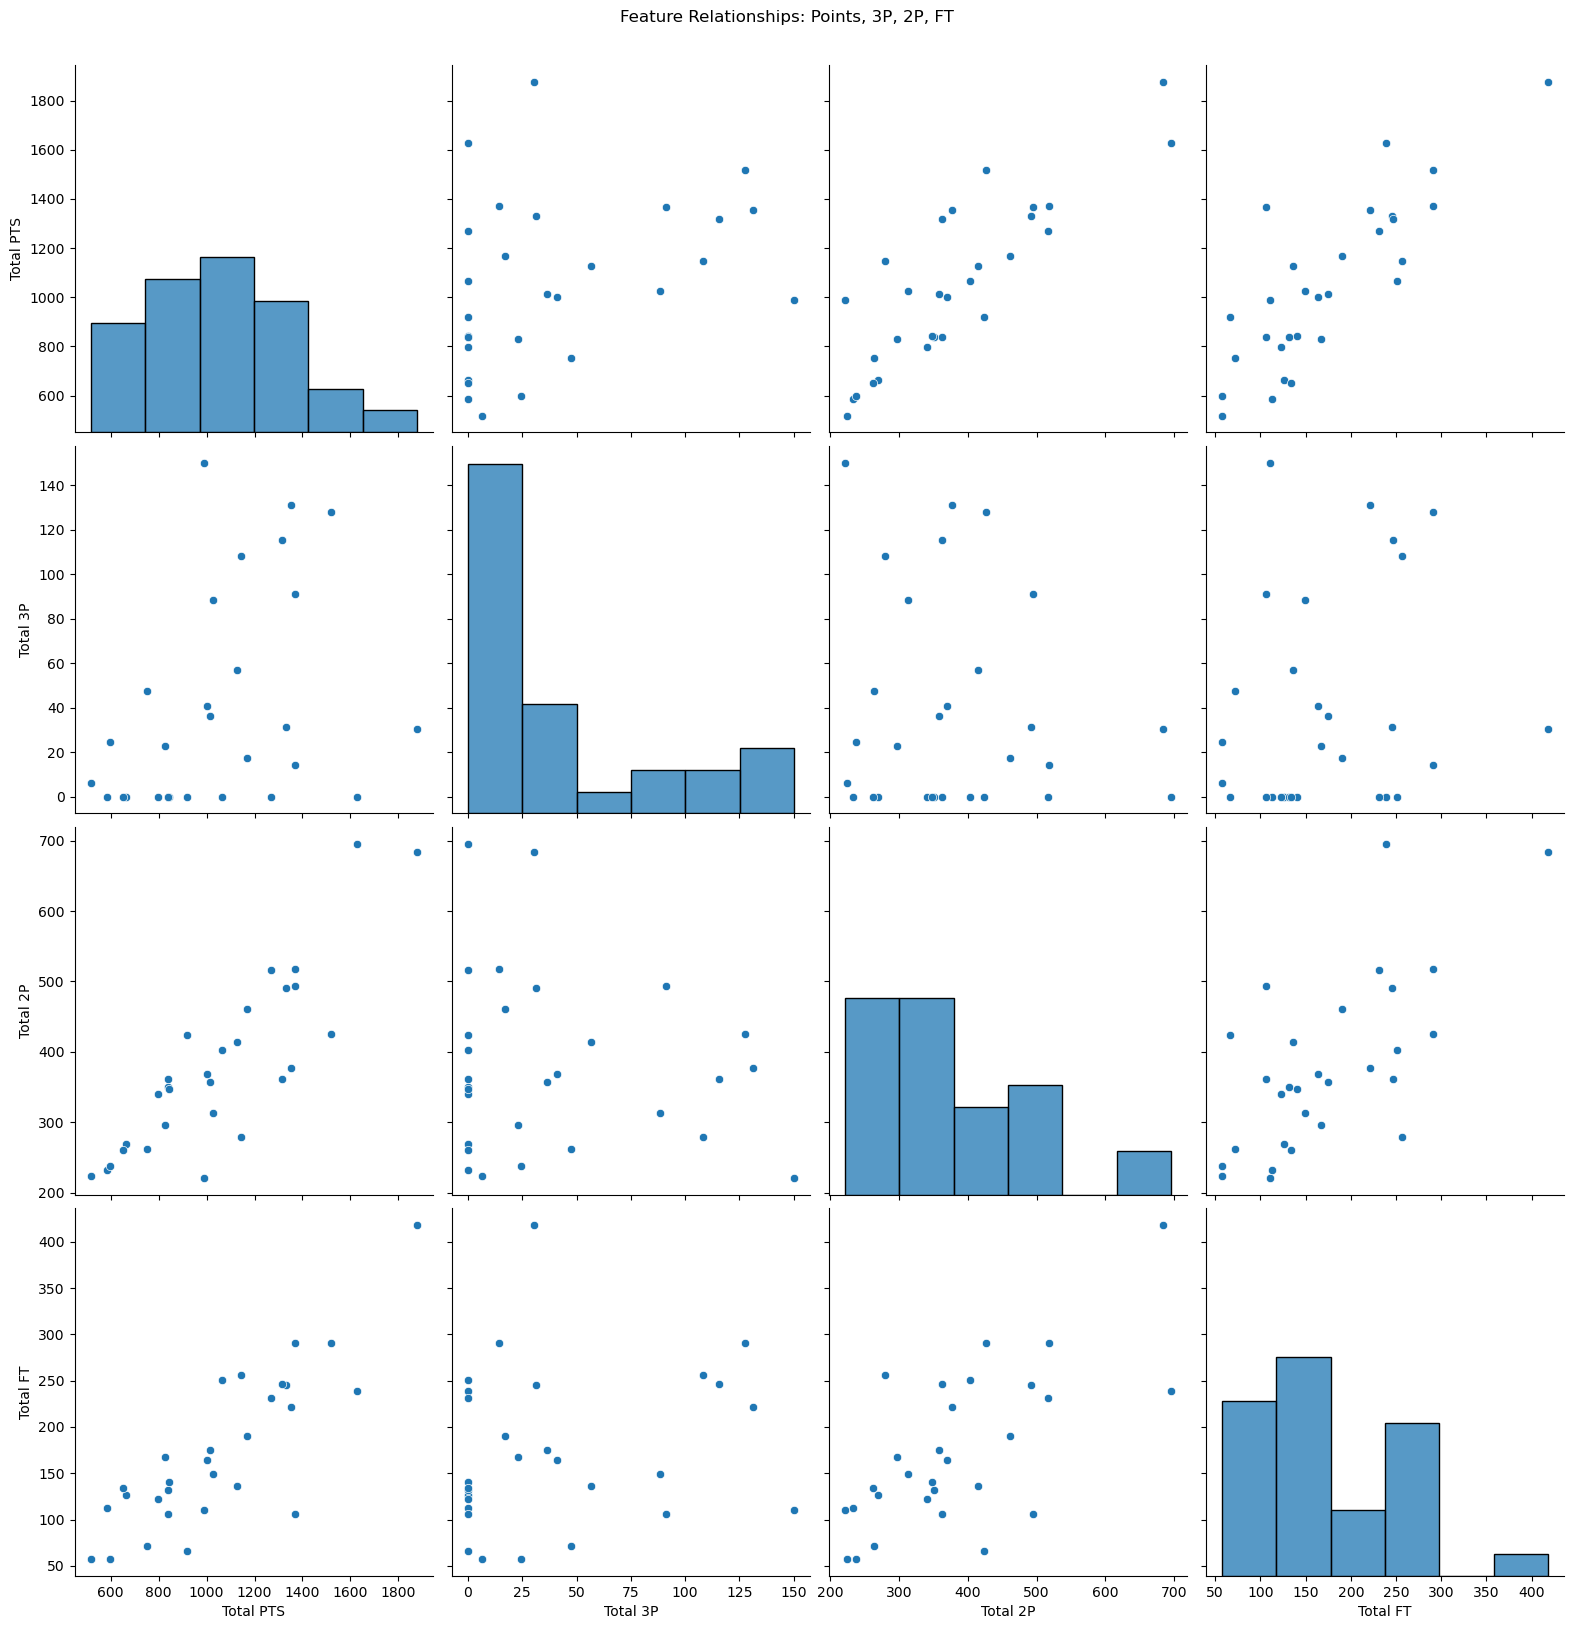

Correlation Coefficients:
-------------------------


,Total PTS,Total 3P,Total 2P,Total FT
Total PTS,1.000000,0.374581,0.855851,0.833555
Total 3P,0.374581,1.000000,-0.125956,0.197232
Total 2P,0.855851,-0.125956,1.000000,0.673178
Total FT,0.833555,0.197232,0.673178,1.000000


,Total PTS,Total 3P,Total 2P,Total FT
Total PTS,1.000000,0.374581,0.855851,0.833555
Total 3P,0.374581,1.000000,-0.125956,0.197232
Total 2P,0.855851,-0.125956,1.000000,0.673178
Total FT,0.833555,0.197232,0.673178,1.000000


In [18]:
plot_feature_relationships(cluster_4)

The correlation matrix for Cluster 4 supports their identity as dominant rebounders and efficient finishers. The strong positive correlation between Total PTS and both Total 2P (0.86) and Total FT (0.83) indicates that scoring for these players comes primarily through close-range shooting and free throws, reinforcing their role as finishers around the basket. The relatively weak correlation between Total 3P and Total PTS (0.37) suggests that three-point shooting is not a major part of their game, aligning with their more traditional, inside-focused style. Their remarkable rebounding and shot-blocking abilities make them key contributors in creating extra possessions and disrupting opposing offenses. With a decent Total AST (162.19), they also contribute as facilitators, showing that their impact extends beyond just scoring and rebounding. The combination of elite rebounding, shot-blocking, and interior scoring places Cluster 4 firmly in the category of players who define their teams through their gritty, physical style of play, making them irreplaceable in the paint and on the boards.

## Cluster 5 (The MVP Archetype)

- Elite Scoring: High Total PTS (2012.31), excelling in two-point shots (553.17, 54.74%), three-point shots (174.20, 36.26%), and free throws (384.60, 79.69%).

- Playmaking: High assists (525.37), showcasing offensive facilitation.

- Defensive Strength: Strong defensive rebounds (473.77) and steals (99.48).

- Durability: Extensive court time (Total MP: 3260.90).

- Versatility: Balanced inside/outside scoring, efficient shooting, and contributions in all phases of the game.

- Weaknesses: High fouls (226.03) and turnovers (221.30).

In [19]:
display(cluster_5)

,Player Name,Archetype,Total MP,Total 3P,Total 3PA,Total 2P,Total 2PA,Total FT,Total FTA,Total ORB,Total DRB,Total AST,Total STL,Total BLK,Total TOV,Total PF,Total PTS
0,Anthony Edwards,5,2772.9,189.6,529.3,529.3,1027.0,426.6,505.6,55.3,379.2,402.9,102.7,39.5,244.9,142.2,2046.1
1,Bruce Brown,5,3733.4,107.0,327.7,452.1,833.9,230.9,284.4,107.2,458.5,385.1,120.4,36.9,170.9,297.9,1449.3
2,Damian Lillard,5,2576.9,219.0,620.5,321.2,657.0,474.5,511.0,36.5,284.7,511.0,73.0,14.6,189.8,131.4,1773.9
3,De'Aaron Fox,5,2656.6,214.6,577.2,503.2,969.4,310.8,421.8,66.6,273.8,414.4,148.0,29.6,192.4,192.4,1968.4
4,DeMar DeRozan,5,2986.2,71.1,221.2,576.7,1129.7,521.4,608.3,39.5,300.2,418.7,86.9,47.4,134.3,158.0,1896.0
5,Dennis SchrÃ¶der,5,4976.6,273.4,735.2,528.0,1117.0,355.7,427.7,77.8,401.4,973.1,127.3,34.9,303.2,333.1,2242.1
6,Devin Booker,5,2448.0,149.6,414.8,489.6,884.0,408.0,455.6,54.4,251.6,469.2,61.2,27.2,176.8,204.0,1842.8
7,Domantas Sabonis,5,2927.4,32.8,90.2,598.6,984.0,295.2,418.2,295.2,828.2,672.4,73.8,49.2,270.6,246.0,1590.8
8,Giannis Antetokounmpo,5,2569.6,36.5,124.1,803.0,1248.3,511.0,781.1,197.1,642.4,474.5,87.6,80.3,248.2,211.7,2219.2
9,Grant Williams,5,4256.2,255.5,670.6,302.3,536.5,212.5,277.3,171.2,468.0,347.5,89.4,77.8,213.2,454.2,1566.6


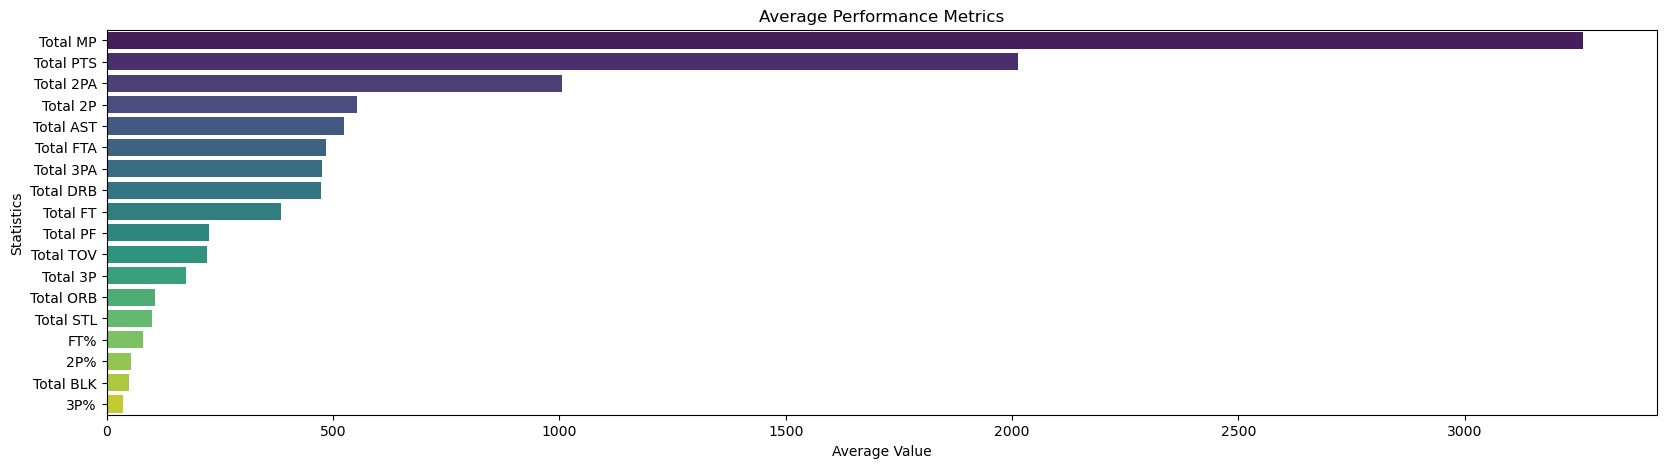

Sorted Stats:
-------------


Total MP     3260.903846
Total PTS    2012.311538
Total 2PA    1005.215385
Total 2P      553.169231
Total AST     525.369231
Total FTA     484.365385
Total 3PA     475.834615
Total DRB     473.765385
Total FT      384.596154
Total PF      226.034615
Total TOV     221.303846
Total 3P      174.200000
Total ORB     107.711538
Total STL      99.484615
FT%            79.690193
2P%            54.743914
Total BLK      48.688462
3P%            36.262344
dtype: float64

Total MP     3260.903846
Total PTS    2012.311538
Total 2PA    1005.215385
Total 2P      553.169231
Total AST     525.369231
Total FTA     484.365385
Total 3PA     475.834615
Total DRB     473.765385
Total FT      384.596154
Total PF      226.034615
Total TOV     221.303846
Total 3P      174.200000
Total ORB     107.711538
Total STL      99.484615
FT%            79.690193
2P%            54.743914
Total BLK      48.688462
3P%            36.262344
dtype: float64

In [20]:
calculate_shooting_efficiency(cluster_5)
plot_sorted_stats(cluster_5)

Cluster 5, which we’ll call "The MVP," is defined by players who excel in virtually every aspect of the game, combining scoring, playmaking, and defensive contributions to dominate the court. With an impressive Total MP (3260.90), these players spend substantial time on the floor, making their presence felt on both ends of the court. Their Total PTS (2012.31) stands as a testament to their scoring ability, with contributions from all areas. They have a well-rounded offensive game, with Total 2P (553.17) showing proficiency around the basket and Total 3P (174.20) and 3P% (36.26%) indicating their solid ability from beyond the arc. These players also contribute significantly as playmakers, with Total AST (525.37) illustrating their ability to facilitate the offense and involve teammates. Defensively, their Total DRB (473.77) and Total STL (99.48) reflect their involvement in securing defensive rebounds and disrupting opposing offenses through steals. Their Total FT (384.60) and FT% (79.69%) show they are adept at drawing fouls and converting at the free-throw line, further adding to their offensive versatility. Although their Total PF (226.03) and Total TOV (221.30) are relatively high, these players make up for it with an all-around ability to impact the game in multiple ways, making them irreplaceable assets to their teams.

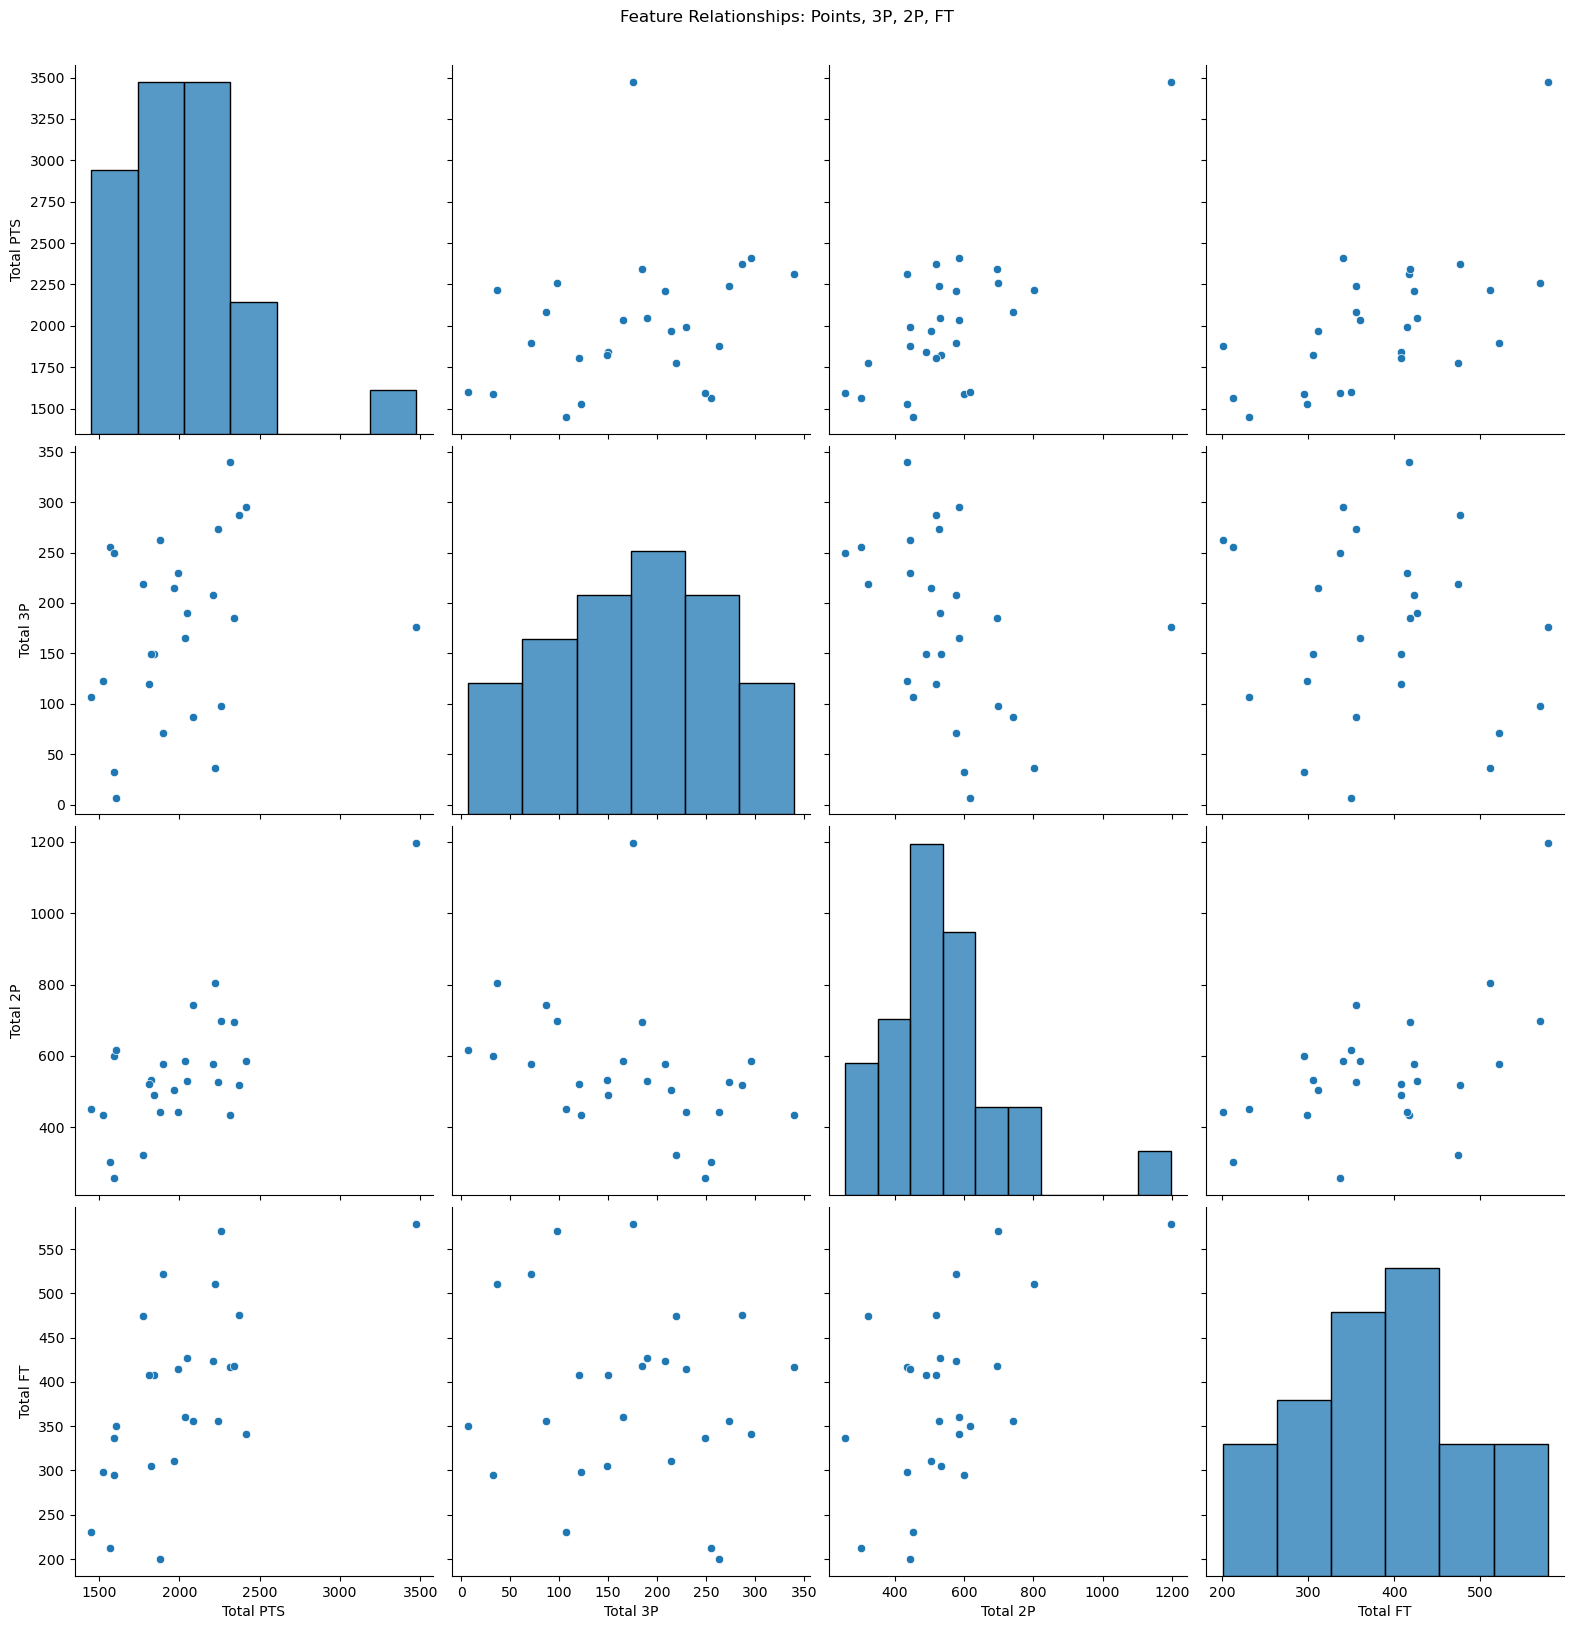

Correlation Coefficients:
-------------------------


,Total PTS,Total 3P,Total 2P,Total FT
Total PTS,1.000000,0.273534,0.763320,0.637665
Total 3P,0.273534,1.000000,-0.382656,-0.138100
Total 2P,0.763320,-0.382656,1.000000,0.549327
Total FT,0.637665,-0.138100,0.549327,1.000000


,Total PTS,Total 3P,Total 2P,Total FT
Total PTS,1.000000,0.273534,0.763320,0.637665
Total 3P,0.273534,1.000000,-0.382656,-0.138100
Total 2P,0.763320,-0.382656,1.000000,0.549327
Total FT,0.637665,-0.138100,0.549327,1.000000


In [21]:
plot_feature_relationships(cluster_5)

The correlation matrix for Cluster 5 emphasizes their versatile and efficient style of play. The strong correlation between Total PTS and both Total 2P (0.76) and Total FT (0.64) indicates that these players score primarily through efficient two-point shooting and free throws, while still maintaining a respectable level of three-point shooting. The negative correlation between Total 3P and Total 2P (-0.38) suggests that these players balance both inside and outside scoring, rather than relying exclusively on one. The correlation between Total FT and Total 2P (0.55) further supports their ability to finish plays and capitalize on fouls in the paint. Their ability to contribute across multiple categories, from scoring and playmaking to rebounding and defense, positions them as true MVP-caliber players. Cluster 5 players bring a mix of offensive efficiency, playmaking, and defensive impact, making them the cornerstone of their teams and the ultimate all-around contributors.

The correlation matrix for Cluster 5 emphasizes their versatile and efficient style of play. The strong correlation between Total PTS and both Total 2P (0.76) and Total FT (0.64) indicates that these players score primarily through efficient two-point shooting and free throws, while still maintaining a respectable level of three-point shooting. The negative correlation between Total 3P and Total 2P (-0.38) suggests that these players balance both inside and outside scoring, rather than relying exclusively on one. The correlation between Total FT and Total 2P (0.55) further supports their ability to finish plays and capitalize on fouls in the paint. Their ability to contribute across multiple categories, from scoring and playmaking to rebounding and defense, positions them as true MVP-caliber players. Cluster 5 players bring a mix of offensive efficiency, playmaking, and defensive impact, making them the cornerstone of their teams and the ultimate all-around contributors.